# **1) Problem Description**

Financial threats are showing a trend on the credit risk of commercial banks as the incredible improvement in the financial industry has emerged. Thus, one of the biggest threats commercial banks face is predicting the risk of credit customers.

**Recent studies are mainly focused on improving the performance of the classifier for credit card default prediction rather than an interpretable model.**

In classification problems, an umbalanced dataset is also crucial to improve model performance because most cases are in one class and only a few examples are in other categories.

**General Objective: Find a classification model to predict the Credit Default of clients of a bank in Taiwan**


# **2) Data Exploration**

**Libraries**

In [ ]:
import numpy as np # numericos
import pandas as pd # tratamiento datos
import matplotlib.pyplot as plt # graficas
import seaborn as sns # graficas
from scipy import  stats # estadisticas

!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 66.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=0c946d1e6e79bca22165bc4758f17d1fb71033c29f03864fd850af0971bea9cd
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=c93800c0d9972852177f39af276a9f89f1a0658ddf2bded1d805104096e36c2e
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


**Import dataset**

In [ ]:
url="https://raw.githubusercontent.com/angesantana/Default-of-credit-card-holders/main/UCI_Credit_Card.csv"

In [ ]:
df=pd.read_csv(url)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **a) Dataset dimention**

In [ ]:
print(f'Number of Rows: {df.shape[0]} and the number of Columns: {df.shape[1]}')

Number of Rows: 30000 and the number of Columns: 25


## **b) Dictionary of variables**

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

# **3) Exploratory Data Analysis**

## **Column names**

In [ ]:
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

## **Review of the Type of Variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## **ID Analysis**

In [ ]:
## ID should be string (text)
df.ID=df.ID.astype(str)

## **SEX Analysis**

In [ ]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Sex should be categorical 
df.SEX=df.SEX.astype("category")

## **EDUCATION Analysis**

In [ ]:
#EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df.EDUCATION[df.EDUCATION==0]=5
df.EDUCATION[df.EDUCATION==6]=5
df.EDUCATION[df.EDUCATION==5]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
# EDUCATION should be categorical
df.EDUCATION=df.EDUCATION.astype("category")

## **MARRIAGE Analysis**

In [ ]:
#MARRIAGE : 1=married, 2=single, 3=others
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.MARRIAGE[df.MARRIAGE==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# MARRIAGE should be categorical
df.MARRIAGE=df.MARRIAGE.astype("category")

## **PAYMENT STATUS Analysis**

In [ ]:
#Repayment status in September, 2005 (-1=pay duly, 
# 1=payment delay for one month,
# 2=payment delay for two months, … 
# 8=payment delay for eight months, 
# 9=payment delay for nine months and above)


In [ ]:
df.PAY_6.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [ ]:
df.PAY_0[df.PAY_0==-2]=np.nan
df.PAY_2[df.PAY_2==-2]=np.nan
df.PAY_3[df.PAY_3==-2]=np.nan
df.PAY_4[df.PAY_4==-2]=np.nan
df.PAY_5[df.PAY_5==-2]=np.nan
df.PAY_6[df.PAY_6==-2]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
## Payment status is converted to category
df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]=df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  object  
 1   LIMIT_BAL                   30000 non-null  float64 
 2   SEX                         30000 non-null  category
 3   EDUCATION                   29655 non-null  category
 4   MARRIAGE                    29946 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       27241 non-null  category
 7   PAY_2                       26218 non-null  category
 8   PAY_3                       25915 non-null  category
 9   PAY_4                       25652 non-null  category
 10  PAY_5                       25454 non-null  category
 11  PAY_6                       25105 non-null  category
 12  BILL_AMT1                   30000 non-null  float64 
 13  BILL_AMT2       

## **Analysis of default.payment.next.month**

In [ ]:
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
## Change name of variable
df.rename(columns={"default.payment.next.month":"Default"},inplace=True)

In [ ]:
df.Default=df.Default.astype("category")

## **Final review / analysis of Variables Type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  object  
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  29655 non-null  category
 4   MARRIAGE   29946 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_0      27241 non-null  category
 7   PAY_2      26218 non-null  category
 8   PAY_3      25915 non-null  category
 9   PAY_4      25652 non-null  category
 10  PAY_5      25454 non-null  category
 11  PAY_6      25105 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

## **Analysis/review of Duplicates**

In [ ]:
df.ID.nunique()

30000

In [ ]:
df.shape

(30000, 25)

* There are not duplicated values.

In [ ]:
n_duplicates = df.duplicated().sum()
n_duplicates

0

## **Analysis/Review of Null values**

In [ ]:
df.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION     345
MARRIAGE       54
AGE             0
PAY_0        2759
PAY_2        3782
PAY_3        4085
PAY_4        4348
PAY_5        4546
PAY_6        4895
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Default         0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

ID            0.000000
LIMIT_BAL     0.000000
SEX           0.000000
EDUCATION     1.150000
MARRIAGE      0.180000
AGE           0.000000
PAY_0         9.196667
PAY_2        12.606667
PAY_3        13.616667
PAY_4        14.493333
PAY_5        15.153333
PAY_6        16.316667
BILL_AMT1     0.000000
BILL_AMT2     0.000000
BILL_AMT3     0.000000
BILL_AMT4     0.000000
BILL_AMT5     0.000000
BILL_AMT6     0.000000
PAY_AMT1      0.000000
PAY_AMT2      0.000000
PAY_AMT3      0.000000
PAY_AMT4      0.000000
PAY_AMT5      0.000000
PAY_AMT6      0.000000
Default       0.000000
dtype: float64

### **Null values treatment**

* Remove null values
* Impute null values

#### **EDUCATION imputation using the Mode**

In [ ]:
df.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
4.0      123
Name: EDUCATION, dtype: int64

In [ ]:
Mode_Education=stats.mode(df.EDUCATION)
print(Mode_Education[0][0])

2.0


In [ ]:
df.EDUCATION=df.EDUCATION.astype("float")
df.EDUCATION=df.EDUCATION.replace(np.nan,Mode_Education[0][0])
df.EDUCATION=df.EDUCATION.astype("category")

#### **MARRIAGE imputation using the Mode**

In [ ]:
df.MARRIAGE.value_counts()

2.0    15964
1.0    13659
3.0      323
Name: MARRIAGE, dtype: int64

In [ ]:
ModeMARRIAGE=stats.mode(df.MARRIAGE)
print(ModeMARRIAGE[0][0])

2.0


In [ ]:
df.MARRIAGE=df.MARRIAGE.astype("float")
df.MARRIAGE=df.MARRIAGE.replace(np.nan,ModeMARRIAGE[0][0])
df.MARRIAGE=df.MARRIAGE.astype("category")

### **Null values elimination**

In [ ]:
df1=df.dropna()

In [ ]:
(100-(len(df1)/len(df))*100)

21.870000000000005

## **Variables counting**

In [ ]:
## Numerical variables
VariablesNumericas=df1._get_numeric_data().columns.to_list()
print(VariablesNumericas)
print(len(VariablesNumericas))

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
14


In [ ]:
## Categorical variables
VariablesCategoricas=df1.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']
10


In [ ]:
## String
VariablesTexto=df1.select_dtypes(include=["object"]).columns.to_list()
print(VariablesTexto)

['ID']


## **3.1) Univariate Analysis Numerical Type**

In [ ]:
MontoCredito=df1.LIMIT_BAL

### **DISTRIBUTION**

#### **Histogram**

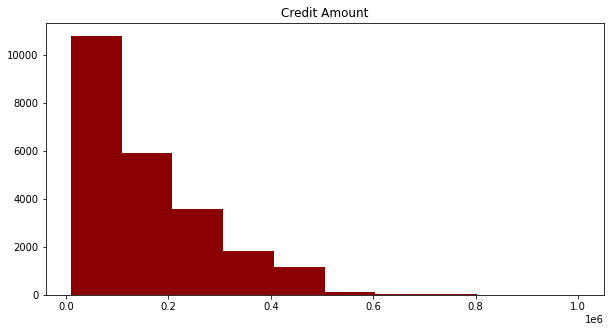

In [ ]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(MontoCredito,facecolor="darkred")
plt.title("Credit Amount")
plt.show()

In [ ]:
PromedioInicial=np.mean(MontoCredito)
print(PromedioInicial)

156369.28537906907


#### **Normality Test**

##### **Plot Q-Q**

Q-Q Plot The theoretical quantile plots (Q-Q Plots). These plots compare the quantiles of the observed distribution to the theoretical quantiles of a normal distribution with the same mean and standard deviation as the data. The closer the data is to a normal, the more aligned the points are around the line.

In [ ]:
import statsmodels.api as sms

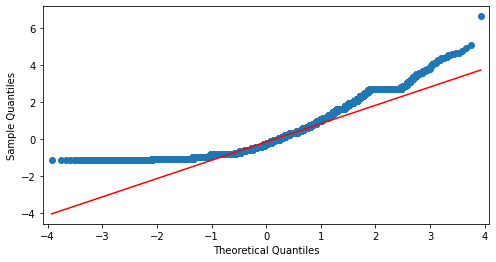

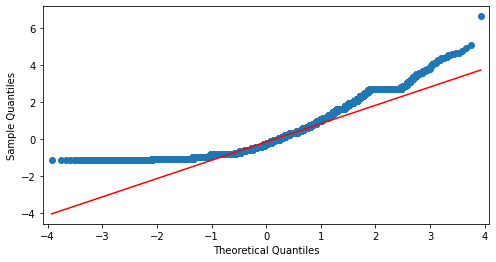

In [ ]:
fig, ax=plt.subplots(figsize=(8,4))
sms.qqplot(MontoCredito,fit=True,line="q",ax=ax)

##### **Hypothesis Test: Normality**

A hypothesis test is a rule that specifies whether a statement about a population can be accepted or rejected depending on the evidence provided by a sample of data.

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods. Parametric statistical methods assume that the data have a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

**Interpretation of a test**
* H0: The credit amount comes from a Normal distribution
* Ha: The credit amount does not come from a Normal distribution

p value;

* p <= alpha : reject H0, it is not normal.
* p> alpha : Do not reject H0, It does not mean that it is certain normality, It means that it is very likely that it is Normal


Shapiro-Wilk test Shapiro-Wilk evaluates a sample of data and quantifies the probability that the data will be drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although it is suggested that the test may be suitable for smaller data samples, for example thousands of observations or fewer.


In [ ]:
df1.shape

(23439, 25)

In [ ]:
stat,pvalue=stats.shapiro(MontoCredito)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
pvalue

0.0

The credit amount is not normal.

##### **Consequences of the lack of normality**

The fact of not being able to assume normality mainly influences the parametric hypothesis tests (t-test, anova,...) and the regression models. The main consequences of the lack of normality are:

Least-squares estimators are not efficient (of least variance).

The confidence intervals of the model parameters and the significance tests are only approximate and not exact.

The exposed statistical tests require that the population from which the sample comes have a normal distribution, not the sample itself. If the sample is normally distributed, it can be accepted that the original population does so. In the event that the sample is not normally distributed but it is certain that the original population is, then it may be justified to accept the results obtained by the parametric tests.

**Central Limit Theorem**

The central limit theorem is a fundamental theorem of probability and statistics. The theorem describes the distribution of the mean of a random sample from a population with finite variance. When the sample size is large enough, the distribution of means approximately follows a normal distribution.


### **Normality may be affected by Atypical Data**

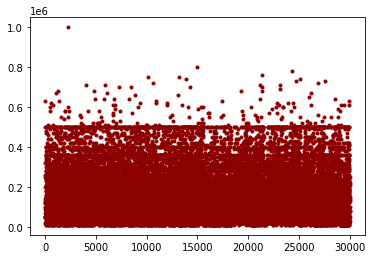

In [ ]:
plt.plot(MontoCredito,".",color="darkred")
plt.show()

**Boxplot**

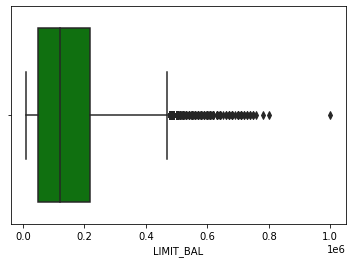

In [ ]:
sns.boxplot(x=MontoCredito,color="green")
plt.show()

In [ ]:
q1,q3=np.percentile(MontoCredito,[25,75])

In [ ]:
q1

50000.0

In [ ]:
q3

220000.0

In [ ]:
RIC=q3-q1

In [ ]:
RIC

170000.0

In [ ]:
#Superior/upper/cap limit
Limite_Superior=q3+1.5*(RIC)
Limite_Superior

475000.0

In [ ]:
#Inferior/floor Limit
Limite_Inferior=q1-1.5*(RIC)

In [ ]:
Limite_Inferior

-205000.0

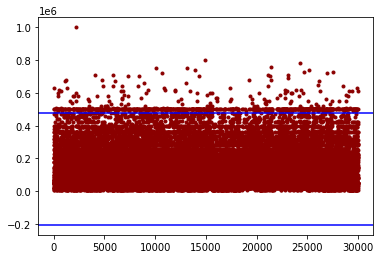

In [ ]:
plt.plot(MontoCredito,".",color="darkred")
plt.axhline(y=Limite_Superior,color="blue")
plt.axhline(y=Limite_Inferior,color="blue")
plt.show()

**Atypical values or outliers**


In [ ]:
df_Sin_Monto_Atipicos= df1[(df1.LIMIT_BAL <= Limite_Superior) & (df1.LIMIT_BAL>=Limite_Inferior)]

In [ ]:
df_Sin_Monto_Atipicos.shape

(22665, 25)

##### **Normality Analysis for Atypical values**

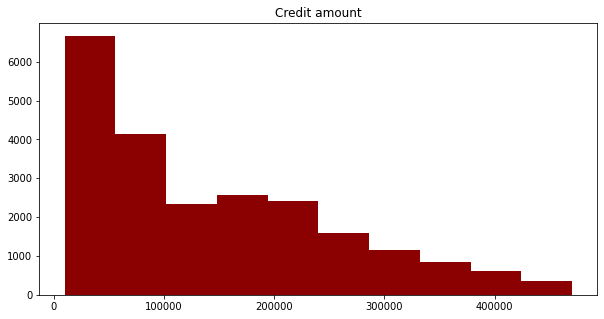

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_Sin_Monto_Atipicos.LIMIT_BAL,facecolor="darkred")
plt.title("Credit amount")
plt.show()

In [ ]:
stat,pvalue=stats.shapiro(df_Sin_Monto_Atipicos.LIMIT_BAL)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
pvalue

0.0

**Removing the atypical values, there is not normality**

#### **Apply a Transformation to reduce bias and find normality**

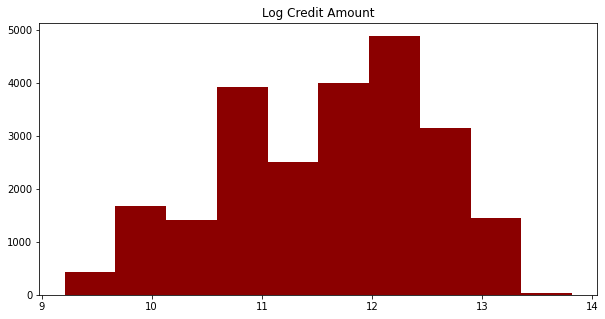

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(np.log(MontoCredito),facecolor="darkred")
plt.title("Log Credit Amount")
plt.show()

* Bias is reduced by log transformation 

## **Bivariate Analysis**


### **Numeric vs Numeric**

Pearson correlation
Pearson's correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

* 1: total positive linear correlation.
* 0: No linear correlation, the two variables probably do not affect each other.
* -1: total negative linear correlation


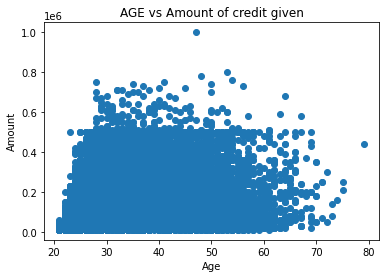

In [ ]:
plt.scatter(df1.AGE,df1.LIMIT_BAL)
plt.title("AGE vs Amount of credit given")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(df1.AGE,df1.LIMIT_BAL)[0]

0.12387554697855657

* There is no linear relationship between the two variables.

**Correlation MATRIX**

In [ ]:
Matrix_Correlation=df.corr()
Matrix_Correlation

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


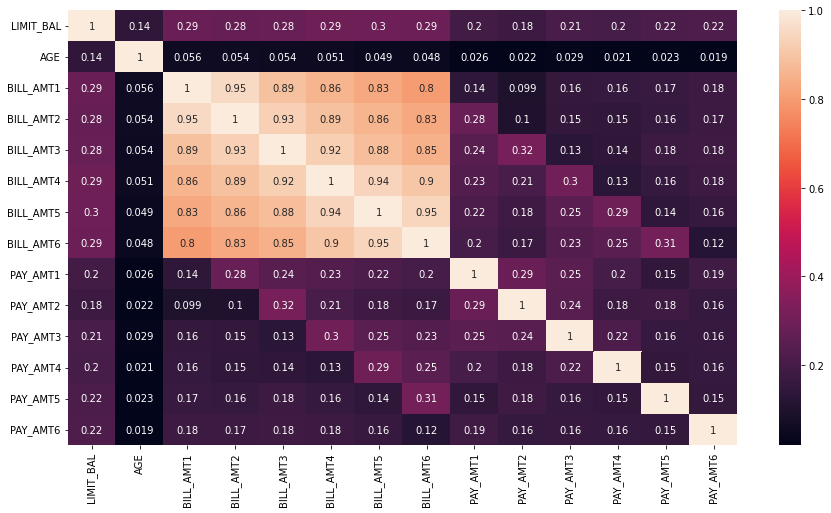

In [ ]:
## Plot of variables correlation
fig, ax= plt.subplots(figsize=(15,8))
sns.heatmap(Matrix_Correlation, annot=True)
plt.show()

### **Categorical vs Numerical**

ANOVA Analysis of Variance (ANOVA) is a statistical method used to assess whether there are significant differences between the means of two or more groups. ANOVA returns two parameters.


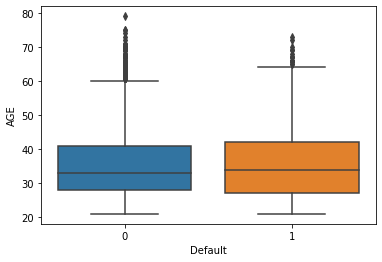

In [ ]:
sns.boxplot(x="Default",y="AGE",data=df1)

In [ ]:
datos=df1[["AGE","Default"]]
datos.groupby("Default").size()

Default
0    18054
1     5385
dtype: int64

In [ ]:
Morosos= datos.loc[datos.Default==1,"AGE"]
NoMorosos= datos.loc[datos.Default==0,"AGE"]

In [ ]:
import pingouin as pg

Ho: media0=Media1: the average age of a defaulter is equal to the age of a non-defaulter

Ha: media0 <> media1: there is a diference in the average age of a defaulter and non-defaulter 

In [ ]:
pg.ttest(x=Morosos,y=NoMorosos,alternative="two-sided",correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.46628,8525.948361,two-sided,0.142609,"[-0.07, 0.51]",0.023336,0.051,0.324063


* P-value is higher than (0.05), so H0 cannot be rejected

## **Cetegorical vs Categorical**

In [ ]:
pd.crosstab(index=df1.Default,columns=df1.EDUCATION)

EDUCATION,1.0,2.0,3.0,4.0
Default,,,,
0,6088,8907,2990,69
1,1479,2867,1036,3


**Chi-square test of independence**

* H0: The variables are Independent 
* Ha: The variables are not Independent

* If p value is lower than0,05, the variables are statistically correlated and in a possible model, the variable should be included.

In [ ]:
tc= pd.crosstab(index=df1.Default,columns=df1.EDUCATION)

In [ ]:
c,p,pchi,test = stats.chi2_contingency(tc)

In [ ]:
p < 0.05

True

* In a possible model, EDUCATION affects the Default. 

# **4) MODEL: CLASSIFICATION**

The terms inference and prediction describe tasks in which we learn from the data in a supervised way to find a model that describes the relationship between the independent variables and the outcome. However, inference and prediction diverge when it comes to the use of the resulting model:

* Inference: Use the model to learn about the process of generating data.
* Prediction: use the model to predict the results of new data points

<img src="https://d33wubrfki0l68.cloudfront.net/478f2689f1b9903ce2feed61a1f5e9c9deb2bcc9/55b03/post/commentary/inference-vs-prediction_files/figure-html/unnamed-chunk-1-1.png" width=500>

**Workflow for inference and prediction**

The basic workflows for inference and prediction are described in the following sections.

**Inference**
* Modeling: Reason about the data generation process and choose the stochastic model that best approximates the data generation process.
* Model Validation: Assess the validity of the stochastic model using residual analysis or goodness-of-fit tests.
* Inference: Use the stochastic model to understand the process of generating data.

**Prediction**

* Modeling: Consider several different models and different parameter settings.
* Model selection: identify the model with the highest predictive performance using validation / test sets; select the model with the highest performance on the test computer.
* Prediction: Apply the selected model on new data with the expectation that the selected model generalizes to unseen data as well.


### **4.1 Imbalance**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


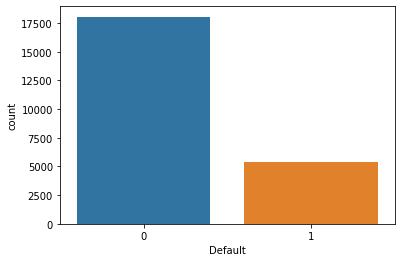

In [ ]:
sns.countplot("Default",data=df1)
plt.show()

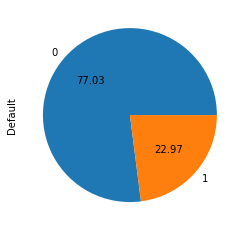

In [ ]:
df1.Default.value_counts().plot(kind="pie",autopct="%.2f")

## **4.2) Model**

In [ ]:
VariablesNumericas

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
VariablesNumericas=['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
VariablesCategoricas=df1.drop(["Default"],axis=1).select_dtypes(include=["category"]).columns.to_list()
VariablesCategoricas

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [ ]:
VariablesCategoricas=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_6',"PAY_3"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def TablaX(df,VariablesNumericas,VariablesCategoricas):
  S=MinMaxScaler()
  datos=df
  if VariablesCategoricas != [] :
    df[VariablesNumericas]=S.fit_transform(df[VariablesNumericas])
    datos_dummies=pd.get_dummies(datos[VariablesCategoricas],drop_first=True)
    X=pd.concat([datos_dummies,  df[VariablesNumericas]],axis=1,sort=False)
  else:
    X = datos_filtro[VariablesNumericas].apply
    X=S.fit_transform(X)
  return X   

In [ ]:
Y=df1.Default

In [ ]:
df1=df1.reset_index(drop=True)

In [ ]:
X=TablaX(df1,VariablesNumericas,VariablesCategoricas)

In [ ]:
X

,SEX_2,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,...,PAY_3_8.0,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,1,0,0,1,0,0,0,0,0,...,0,0.111111,0.086207,0.148892,0.000000,0.000815,0.001116,0.001610,0.000000,0.003783
1,1,1,0,0,1,0,1,0,0,0,...,0,0.080808,0.224138,0.172392,0.001738,0.001222,0.001116,0.001610,0.002345,0.009458
2,1,1,0,0,0,0,1,0,0,0,...,0,0.040404,0.275862,0.188100,0.002290,0.001645,0.001339,0.001771,0.002506,0.001892
3,0,1,0,0,0,0,0,0,0,0,...,0,0.040404,0.620690,0.154144,0.002290,0.029893,0.011160,0.014493,0.001615,0.001284
4,0,0,0,0,1,0,1,0,0,0,...,0,0.040404,0.275862,0.203506,0.002862,0.001479,0.000733,0.001610,0.002345,0.001513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23434,0,0,1,0,0,0,1,0,0,0,...,0,0.212121,0.310345,0.313716,0.009730,0.016299,0.005583,0.004907,0.011723,0.001892
23435,0,0,1,0,1,0,0,0,0,0,...,0,0.141414,0.379310,0.148008,0.002103,0.002873,0.010042,0.000208,0.000000,0.000000
23436,0,1,0,0,1,0,0,0,0,0,...,0,0.020202,0.275862,0.149674,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
23437,0,0,1,0,0,0,0,1,0,0,...,0,0.070707,0.344828,0.145064,0.098334,0.002778,0.001315,0.003101,0.124174,0.003412


In [ ]:
X.shape[1]

41

### **4.2.1) Variables selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif,mutual_info_classif

In [ ]:
Mejores_Variables=SelectKBest(score_func=f_classif,k=X.shape[1])
fit=Mejores_Variables.fit(X,Y)
Puntajes=pd.DataFrame(fit.scores_)
Columnas=pd.DataFrame(X.columns)
df_completo=pd.concat([Columnas,Puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
df_completo=df_completo.nlargest(15,"Puntaje")
Variables=df_completo.Variable.to_list()

In [ ]:
Variables

['PAY_0_2.0',
 'PAY_3_2.0',
 'PAY_0_0.0',
 'PAY_6_2.0',
 'PAY_3_0.0',
 'LIMIT_BAL',
 'PAY_0_3.0',
 'PAY_6_0.0',
 'PAY_0_1.0',
 'PAY_6_3.0',
 'PAY_3_3.0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_6_7.0',
 'PAY_0_4.0']

### **4.2.2) Train y Test**
Assessing the predictive capacity of a model consists of checking its predictions to approximate the true values ​​of the response variable. In order to be able to quantify it correctly, it is necessary to have a set of observations, for which the response variable is known, but that the model has not "seen", that is, that they have not participated in its adjustment. For this purpose, the available data is divided into a training set and a test set.

It is important to verify that the distribution of the response variable is similar in the training set and in the test set. To ensure that this is true, the scikit-learn function train_test_split() allows, in classification problems, to identify with the stratify argument the variable based on which to make the distribution.

This type of stratified distribution ensures that the training set and the test set are similar in terms of the response variable, however, it does not guarantee that the same thing happens with the predictors.

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X[Variables],Y,test_size=0.3,random_state=123,stratify=Y)

In [ ]:
print(x_train.shape)

(16407, 15)


In [ ]:
print(len(y_test))

7032


## **SMOTE - Addressing Imbalance in dataset**

In [ ]:
from imblearn.combine import SMOTETomek
os_us = SMOTETomek()

In [ ]:
y_train.value_counts()/len(y_train)
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
print("before balance: ", Counter(y_train))
balance = RandomOverSampler(random_state=123)
X_train_over, y_train_over = balance.fit_resample(x_train, y_train)
print("After balance: ", Counter(y_train_over))

before balance:  Counter({0: 12638, 1: 3769})
After balance:  Counter({0: 12638, 1: 12638})


In [ ]:
x_train=X_train_over
y_train=y_train_over

### **4.2.3) Decision trees: Classification**

In [ ]:
# Model
from sklearn.tree import DecisionTreeClassifier
# Plots
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import tree
# To Optimize the Model in Validation phase 
from sklearn.model_selection import GridSearchCV
# Models evaluation

In [ ]:
Modelo_AD= DecisionTreeClassifier(criterion="gini",random_state=123,max_depth=4) ## Modelo Estandar
Modelo_AD.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

**Tree Plot**

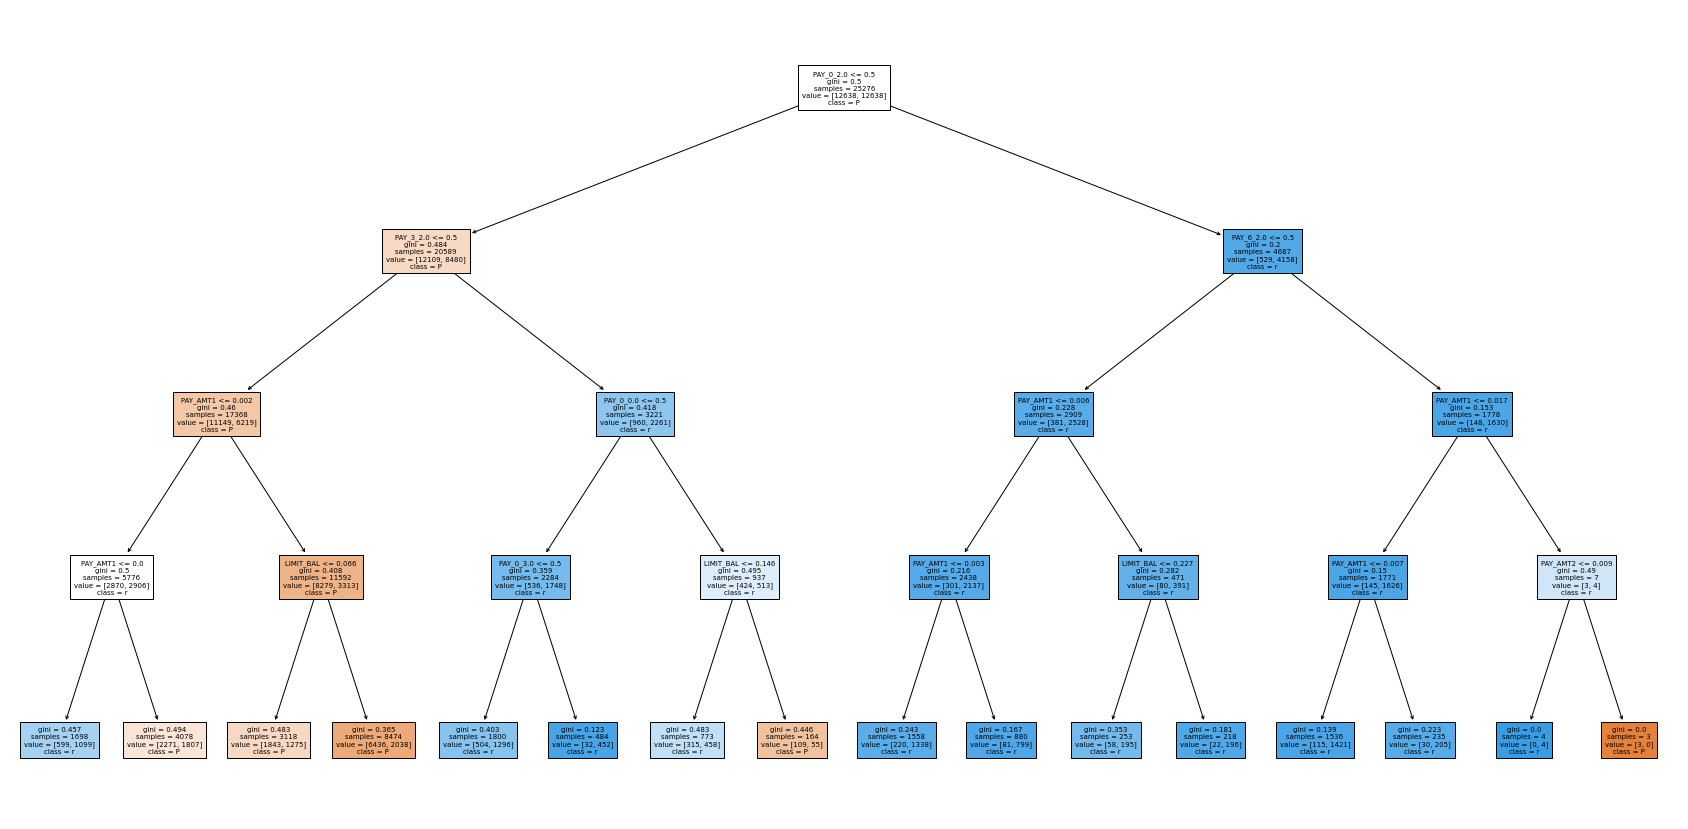

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
plot=plot_tree(decision_tree=Modelo_AD,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="Prediccion de Default Credito",
                ax            = ax
              )

**Importance of the Variables**

In [ ]:
Importancia_Predictores=pd.DataFrame(
{"predictor":x_train.columns,
 "Importancia":Modelo_AD.feature_importances_})

Importancia_Predictores=Importancia_Predictores.sort_values("Importancia",ascending=False)
Importancia_Predictores=Importancia_Predictores.reset_index(drop=True)

In [ ]:
Importancia_Predictores

,predictor,Importancia
0,PAY_0_2.0,0.557072
1,PAY_3_2.0,0.207562
2,PAY_AMT1,0.152210
3,LIMIT_BAL,0.048787
4,PAY_0_0.0,0.020366
5,PAY_0_3.0,0.011272
6,PAY_6_2.0,0.001624
7,PAY_AMT2,0.001107
8,PAY_3_0.0,0.000000
9,PAY_6_0.0,0.000000


**Prediction error**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import  metrics

In [ ]:
Predicciones_Test_AD=Modelo_AD.predict(X=x_test)
Accuracy_Test_AD=metrics.accuracy_score(y_test,Predicciones_Test_AD)
print(Accuracy_Test_AD)

0.7765927189988624


In [ ]:
Reporte_Test_AD=metrics.classification_report(y_test,Predicciones_Test_AD)
print(Reporte_Test_AD)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5416
           1       0.51      0.58      0.55      1616

    accuracy                           0.78      7032
   macro avg       0.69      0.71      0.70      7032
weighted avg       0.79      0.78      0.78      7032



In [ ]:
precision, recall, fscore, support = score(y_test,Predicciones_Test_AD)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]
f1_Score_AD_1

0.5460849465472407

**ROC Curve - Receiver Operating Characteristic (ROC)**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

0.76


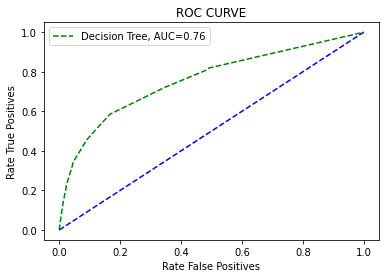

In [ ]:
Probabilidad_test_AD=Modelo_AD.predict_proba(X=x_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_AD[:,1])
AUC_AD=round(roc_auc_score(y_test, Probabilidad_test_AD[:,1]),2)
print(AUC_AD)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_AD))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("ROC CURVE")
plt.xlabel("Rate False Positives")
plt.ylabel("Rate True Positives")
plt.legend()
plt.show()

### **4.2.4) Optimization Decision Trees: Classification**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
max_depth=range(1,30,1)
min_samples_leaf= range(1,20,1)

In [ ]:
#param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
#kfold = KFold(n_splits=10, shuffle=False, random_state=None)
#grid_search = GridSearchCV(Modelo_AD, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
#grid_result = grid_search.fit(x_train, y_train)

In [ ]:
#print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
Arbol_Optimo=DecisionTreeClassifier(criterion='gini',
                                             max_depth=4,
                                    min_samples_leaf=11,
                                             random_state=123)
Arbol_Optimo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=11, random_state=123)

Tree depth: 4
Number of termnal nodes: 16


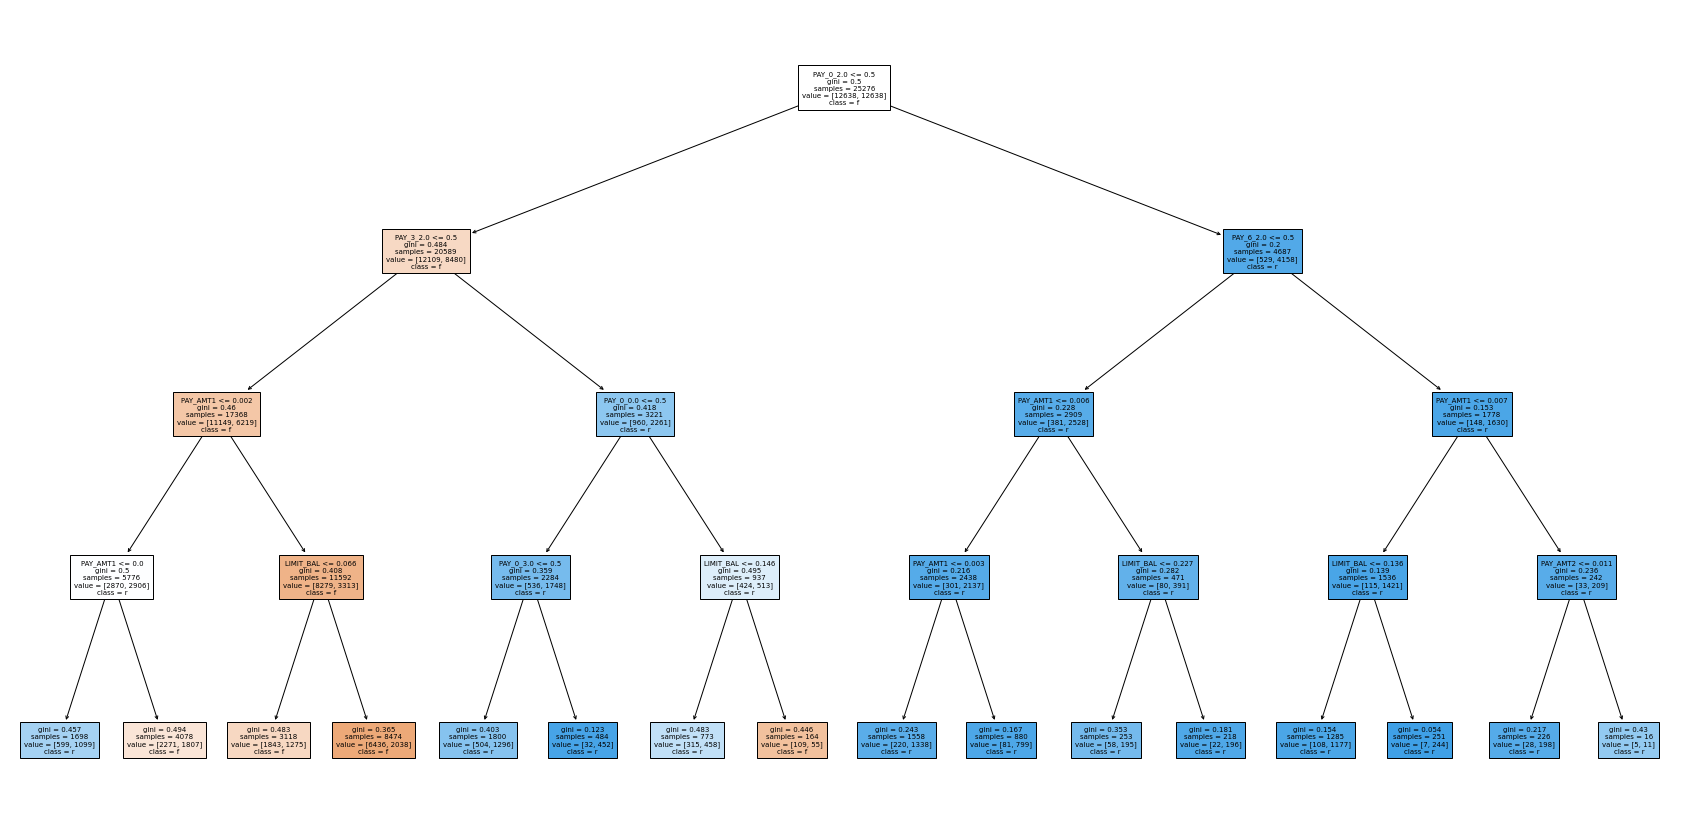

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Tree depth: {Arbol_Optimo.get_depth()}")
print(f"Number of termnal nodes: {Arbol_Optimo.get_n_leaves()}")
plot=plot_tree(decision_tree=Arbol_Optimo,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

In [ ]:
Predicciones_Test_AD_Optimo=Arbol_Optimo.predict(X=x_test)
Accuracy_Test_AD_Optimo=metrics.accuracy_score(y_test,Predicciones_Test_AD_Optimo)
print(Accuracy_Test_AD_Optimo)

0.7763083048919226


In [ ]:
Reporte_Test_AD_Optimo=metrics.classification_report(y_test,Predicciones_Test_AD_Optimo)
print(Reporte_Test_AD_Optimo)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5416
           1       0.51      0.58      0.55      1616

    accuracy                           0.78      7032
   macro avg       0.69      0.71      0.70      7032
weighted avg       0.79      0.78      0.78      7032



In [ ]:
precision, recall, fscore, support = score(y_test,Predicciones_Test_AD_Optimo)
f1_Score_AD_Op_0=fscore[0]
f1_Score_AD_Op_1=fscore[1]
f1_Score_AD_Op_1

0.5457695639618828

0.76


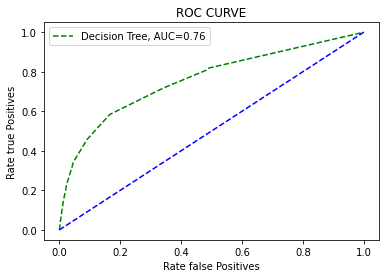

In [ ]:
Probabilidad_test_AD=Arbol_Optimo.predict_proba(X=x_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_AD[:,1])
AUC_AD_OP=round(roc_auc_score(y_test, Probabilidad_test_AD[:,1]),2)
print(AUC_AD_OP)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_AD_OP))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("ROC CURVE")
plt.xlabel("Rate false Positives")
plt.ylabel("Rate true Positives")
plt.legend()
plt.show()

### **4.2.5) Random Forest: Clasification**

The term assembler means group. Assembler-type methods are made up of a group of predictive models that allow to achieve a better precision and stability of the model. These provide a significant improvement to decision tree models.

Why do tree assemblers arise?

* Like all models, a decision tree also suffers from bias and variance problems. That is, 'how much on average are the predicted values ​​different from the actual values' (bias) and 'how different would the predictions of a model be at the same point if different samples were taken from the same population' (variance).

* Building a small tree will result in a model with low variance and high bias. Typically, with increasing model complexity, you will see a reduction in prediction error due to a lower bias in the model. At some point the model will be very complex and an over-fitting of the model will occur which will start to suffer from high variance.

* The optimal model should maintain a balance between these two types of errors. This is known as a “trade-off” between bias and variance errors. The use of assemblers is one way to apply this trade-off

**Random Forest Advantages**

* There are very few assumptions and therefore data preparation is minimal.
* It can handle up to thousands of input variables and identify the most significant ones. Dimensionality reduction method.
* One of the outputs of the model is the importance of variables.
* Incorporates effective methods to estimate missing values.
* It is possible to use it as an unsupervised method (clustering) and outlier detection.

**Random Forest Disadvantages**

* Loss of interpretation
* Good for classification, not so much for regression. Predictions are not continuous in nature.
* In regression, you cannot predict beyond the range of values ​​of the training set.
* Little control over what the model does (black box model for statistical modellers).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Modelo_RF=RandomForestClassifier(criterion="gini",n_estimators=100,
                                bootstrap=True,random_state=1234)
Modelo_RF=Modelo_RF.fit(x_train,y_train)

In [ ]:
Predicciones_test_RF=Modelo_RF.predict(X=x_test)
Accuracy_RF_test=metrics.accuracy_score(y_test,Predicciones_test_RF)
print(Accuracy_RF_test)
Reporte_RF_test=metrics.classification_report(y_test,Predicciones_test_RF)
print(Reporte_RF_test)
precision, recall, fscore, support = score(y_test,Predicciones_test_RF)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]
print(f1_Score_RF_1)

0.7609499431171786
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5416
           1       0.48      0.47      0.48      1616

    accuracy                           0.76      7032
   macro avg       0.66      0.66      0.66      7032
weighted avg       0.76      0.76      0.76      7032

0.47550702028081127


0.73


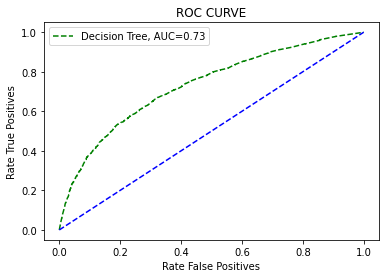

In [ ]:
Probabilidad_test_RF=Modelo_RF.predict_proba(X=x_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_RF[:,1])
AUC_RF=round(roc_auc_score(y_test, Probabilidad_test_RF[:,1]),2)
print(AUC_RF)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_RF))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("ROC CURVE")
plt.xlabel("Rate False Positives")
plt.ylabel("Rate True Positives")
plt.legend()
plt.show()

##  **4.2.6) Optimization Random Forest**

In [ ]:
param_grid = {'n_estimators': [100,],
              'max_features': [5,7, 9],
              'max_depth'   : [6],
              'criterion'   : ['gini']
             }

In [ ]:
import multiprocessing
from sklearn.model_selection import RepeatedKFold
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [6],
                         'max_features': [5, 7, 9], 'n_estimators': [100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Best hyperparameters by cross validation
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'n_estimators': 100} : 0.7296250213891915 accuracy


In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
Predicciones_test_RF_O=modelo_final.predict(X=x_test)
Accuracy_RF_O_test=metrics.accuracy_score(y_test,Predicciones_test_RF_O)
print(Accuracy_RF_O_test)
Reporte_RF_O_test=metrics.classification_report(y_test,Predicciones_test_RF_O)
print(Reporte_RF_O_test)
precision, recall, fscore, support = score(y_test,Predicciones_test_RF_O)
f1_Score_RF_O_0=fscore[0]
f1_Score_RF_O_1=fscore[1]
print(f1_Score_RF_O_1)

0.7764505119453925
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5416
           1       0.51      0.61      0.56      1616

    accuracy                           0.78      7032
   macro avg       0.69      0.72      0.70      7032
weighted avg       0.79      0.78      0.78      7032

0.5554298642533937


0.78


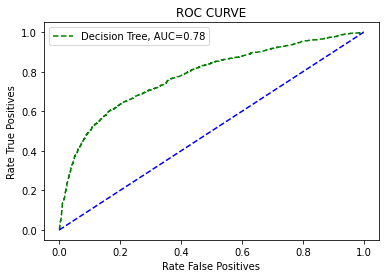

In [ ]:
Probabilidad_test_RFO=modelo_final.predict_proba(X=x_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_RFO[:,1])
AUC_RFO=round(roc_auc_score(y_test, Probabilidad_test_RFO[:,1]),2)
print(AUC_RFO)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_RFO))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("ROC CURVE")
plt.xlabel("Rate False Positives")
plt.ylabel("Rate True Positives")
plt.legend()
plt.show()

##  **4.2.7) Gradient Boostingt**

A gradient boosting model is made up of a set of individual decision trees, trained sequentially, so that each new tree tries to improve the errors of the previous trees. The prediction of a new observation is obtained by adding the predictions of all the individual trees that make up the model.

**Advantage**

* They are able to select predictors automatically.
* They can be applied to regression and classification problems.
* Trees can, in theory, handle both numerical and categorical predictors without having to create dummy variables or one-hot-encoding. In practice, this depends on the implementation of the algorithm that each library has.

* As these are non-parametric methods, it is not necessary that any specific type of distribution be met.

* They generally require much less data cleaning and pre-processing compared to other statistical learning methods (for example, they do not require standardization).

* They are not very influenced by outliers.

**Disadvantages**

* When combining multiple trees, the interpretability of models based on a single tree is lost.

* When dealing with continuous predictors, they lose some of their information by categorizing them at the time of node splitting.

* As described later, the creation of the tree branches is achieved by the recursive binary splitting algorithm. This algorithm identifies and evaluates the possible divisions of each predictor according to a certain measure (RSS, Gini, entropy...). Continuous predictors or qualitative predictors with many levels are more likely to contain, just by chance, some optimal cut-off point, so they are usually favored in the creation of trees.

They are not able to extrapolate outside the range of the predictors observed in the training data.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {'n_estimators'  : [20,30],
              #'max_features'  : ['auto'],
              'max_depth'     : [7,10,12],
              'learning_rate' : [ 0.1]
             }
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )
grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=123),
             estimator=GradientBoostingClassifier(random_state=123), n_jobs=1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7, 10, 12],
                         'n_estimators': [20, 30]},
             return_train_score=True, scoring='accuracy')

In [ ]:
modelo_final_GB = grid.best_estimator_

In [ ]:
Predicciones_test_GBC_O=modelo_final_GB.predict(X=x_test)
Accuracy_GBC_test_O=metrics.accuracy_score(y_test,Predicciones_test_GBC_O)
print(Accuracy_GBC_test_O)
Reporte_GBC_test_O=metrics.classification_report(y_test,Predicciones_test_GBC_O)
print(Reporte_GBC_test_O)
precision, recall, fscore, support = score(y_test,Predicciones_test_GBC_O)
f1_Score_GBC_O_0=fscore[0]
f1_Score_GBC_O_1=fscore[1]

0.773037542662116
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5416
           1       0.51      0.52      0.51      1616

    accuracy                           0.77      7032
   macro avg       0.68      0.68      0.68      7032
weighted avg       0.78      0.77      0.77      7032



0.74


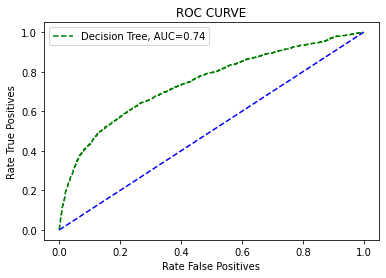

In [ ]:
Probabilidad_test_GB1=modelo_final_GB.predict_proba(X=x_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_GB1[:,1])
AUC_GB1=round(roc_auc_score(y_test, Probabilidad_test_GB1[:,1]),2)
print(AUC_GB1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_GB1))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("ROC CURVE")
plt.xlabel("Rate False Positives")
plt.ylabel("Rate True Positives")
plt.legend()
plt.show()

# 5) **MODEL SELECTION**

In [ ]:
df_ComparationModels=pd.DataFrame({"Models":["DecisionTree","DecisionTreeOpt","RandomForest","RandomForestOPT","XGBoosting"],
                                   "AccuracyTest":[Accuracy_Test_AD,Accuracy_Test_AD_Optimo,Accuracy_RF_test,Accuracy_RF_O_test,Accuracy_GBC_test_O],
                                   "F1_score0":[f1_Score_AD_0,f1_Score_AD_Op_0,f1_Score_RF_0,f1_Score_RF_O_0,f1_Score_GBC_O_0],
                                   "F1-Score1":[f1_Score_AD_1,f1_Score_AD_Op_1,f1_Score_RF_1,f1_Score_RF_O_1,f1_Score_GBC_O_1],
                                   "AUC":[AUC_AD,AUC_AD_OP,AUC_RF,AUC_RFO,AUC_GB1]})

In [ ]:
df_ComparationModels.sort_values("F1-Score1",ascending=False)

,Models,AccuracyTest,F1_score0,F1-Score1,AUC
3,RandomForestOPT,0.776451,0.850684,0.555430,0.78
0,DecisionTree,0.776593,0.851834,0.546085,0.76
1,DecisionTreeOpt,0.776308,0.851618,0.545770,0.76
4,XGBoosting,0.773038,0.852030,0.513118,0.74
2,RandomForest,0.760950,0.845198,0.475507,0.73


**Model iteration Results with imbalanced data**

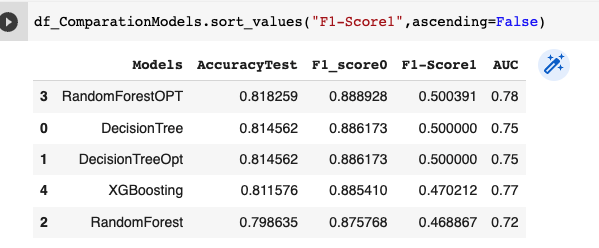

## **The best Model is Random Forest**

In [ ]:
df_ComparationModels.sort_values("F1-Score1",ascending=False).head(1)

,Models,AccuracyTest,F1_score0,F1-Score1,AUC
3,RandomForestOPT,0.776451,0.850684,0.55543,0.78


## **Exporting Model**

In [ ]:
import pickle 
pickle_out = open("ModelDefault.pkl", mode = "wb") 
pickle.dump(modelo_final, pickle_out) 
pickle_out.close()

**Clients Scoring monthly **

In [ ]:
datosnuevos=x_test

In [ ]:
datosnuevos.columns.to_list()

['PAY_0_2.0',
 'PAY_3_2.0',
 'PAY_0_0.0',
 'PAY_6_2.0',
 'PAY_3_0.0',
 'LIMIT_BAL',
 'PAY_0_3.0',
 'PAY_6_0.0',
 'PAY_0_1.0',
 'PAY_6_3.0',
 'PAY_3_3.0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_6_7.0',
 'PAY_0_4.0']

In [ ]:
## Importing the Model

pickle_in = open('ModelDefault.pkl', 'rb') 
classifier = pickle.load(pickle_in)

In [ ]:
classifier

RandomForestClassifier(max_depth=6, max_features=5, random_state=123)

In [ ]:
prediccion = classifier.predict(datosnuevos)

In [ ]:
prediccion

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
datosnuevos["PrediccionDefault"]=prediccion

In [ ]:
datosnuevos.head()

,PAY_0_2.0,PAY_3_2.0,PAY_0_0.0,PAY_6_2.0,PAY_3_0.0,LIMIT_BAL,PAY_0_3.0,PAY_6_0.0,PAY_0_1.0,PAY_6_3.0,PAY_3_3.0,PAY_AMT1,PAY_AMT2,PAY_6_7.0,PAY_0_4.0,PrediccionDefault
14325,0,0,1,0,1,0.252525,0,1,0,0,0,0.001488,0.000896,0,0,0
4882,0,0,1,0,1,0.232323,0,1,0,0,0,0.011448,0.007334,0,0,0
23145,1,1,0,1,0,0.101010,0,0,0,0,0,0.000000,0.002445,0,0,1
15804,0,0,1,0,1,0.070707,0,1,0,0,0,0.001743,0.001277,0,0,0
12633,1,1,0,1,0,0.060606,0,0,0,0,0,0.001946,0.001304,0,0,1


# **All clients**

In [ ]:
df1.shape

(23439, 25)

In [ ]:
X.shape

(23439, 41)

In [ ]:
prediccion = classifier.predict(X[['PAY_0_2.0',
 'PAY_3_2.0',
 'PAY_0_0.0',
 'PAY_6_2.0',
 'PAY_3_0.0',
 'LIMIT_BAL',
 'PAY_0_3.0',
 'PAY_6_0.0',
 'PAY_0_1.0',
 'PAY_6_3.0',
 'PAY_3_3.0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_6_7.0',
 'PAY_0_4.0']])

In [ ]:
prediccion

array([1, 0, 0, ..., 1, 0, 0])